In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Input(shape=(28, 28, 1)),  # Explicit Input layer
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
history = model.fit(
    X_train, y_train_cat,
    batch_size=128,
    epochs=10,
    verbose=1,
    validation_data=(X_test, y_test_cat)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.8479 - loss: 0.4821 - val_accuracy: 0.9824 - val_loss: 0.0529
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9731 - loss: 0.0898 - val_accuracy: 0.9868 - val_loss: 0.0366
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.9789 - loss: 0.0684 - val_accuracy: 0.9881 - val_loss: 0.0363
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9846 - loss: 0.0490 - val_accuracy: 0.9892 - val_loss: 0.0327
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.9863 - loss: 0.0440 - val_accuracy: 0.9909 - val_loss: 0.0296
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 67ms/step - accuracy: 0.9878 - loss: 0.0380 - val_accuracy: 0.9907 - val_loss: 0.0288
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9895 - loss: 0.0350 - val_accuracy: 0.9916 - val_loss: 0.0273
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.9908 - loss: 0.0291 - 

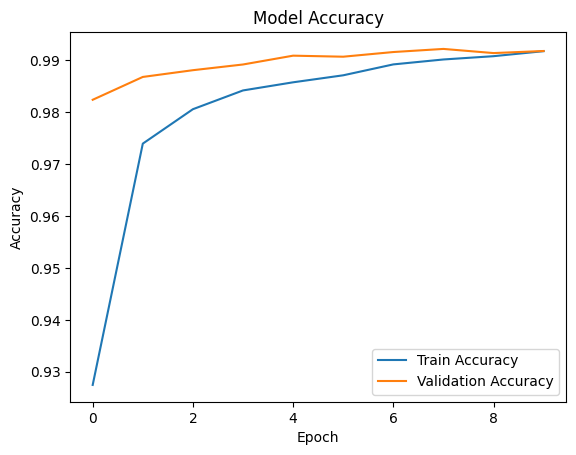

In [6]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


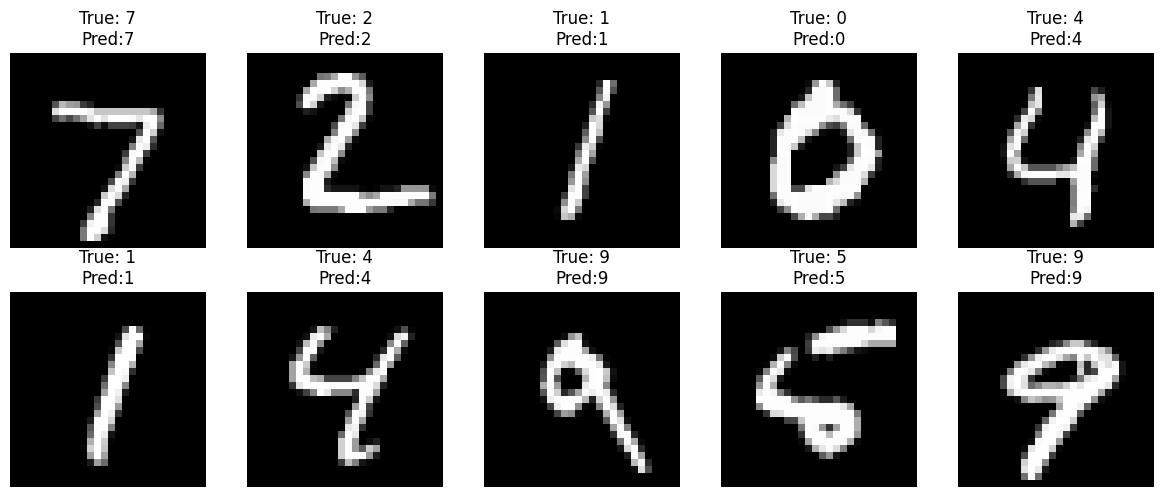

In [8]:
plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred:{y_pred_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()